In [12]:
import pandas as pd
import yfinance as yf
import datetime
import numpy as np
import matplotlib.pyplot as plt

In [13]:
def download_data(stock,start,end):
    ticker = yf.download(stock,start,end)
    return pd.DataFrame(ticker)

def calculate_atr(data):
    high_low = data['High'] - data['Low']
    high_close = np.abs(data['High'] - data['Close'].shift(1))
    low_close = np.abs(data['Low'] - data['Close'].shift(1))
    
    ranges = pd.concat([high_low,high_close,low_close], axis=1)
    columns = ['high-low','high-close','low-close']
    ranges.columns= columns
    true_ranges = np.max(ranges, axis=1)
    atr = true_ranges.rolling(14).mean()
    return atr

In [14]:
start_date = datetime.datetime(2011,4,1)
end_date = datetime.datetime(2013,1,1)
stock_data = download_data('XOM',start_date,end_date)
stock_data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2011-03-31,84.820000,84.940002,84.110001,84.129997,55.584343,15317800
2011-04-01,84.720001,84.839996,84.169998,84.680000,55.947723,15531500
2011-04-04,84.260002,84.930000,84.070000,84.870003,56.073273,13096100
2011-04-05,84.680000,85.940002,84.559998,85.419998,56.436634,17122600
2011-04-06,85.730003,85.889999,84.959999,85.180000,56.278080,13339700
...,...,...,...,...,...,...
2012-12-24,87.129997,87.320000,86.800003,86.919998,59.964222,6385200
2012-12-26,87.209999,87.680000,86.570000,87.070000,60.067703,10737800
2012-12-27,87.050003,87.239998,85.750000,86.860001,59.922817,14258500


In [15]:
atr_values = calculate_atr(stock_data)

In [23]:
atr_values.dropna(inplace=True)


Date
2011-04-19    1.224286
2011-04-20    1.299286
2011-04-21    1.310715
2011-04-25    1.292858
2011-04-26    1.284286
                ...   
2012-12-24    1.042143
2012-12-26    1.037857
2012-12-27    1.085714
2012-12-28    1.151428
2012-12-31    1.240714
Length: 428, dtype: float64

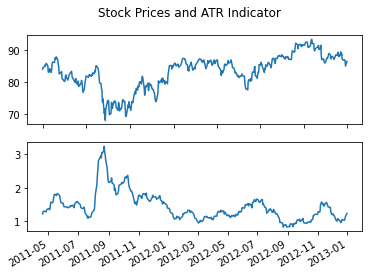

In [26]:
fig, (ax1,ax2) = plt.subplots(2)
fig.suptitle('Stock Prices and ATR Indicator')
ax1.plot(stock_date['Close'])
ax2.plot(atr_values)
fig.autofmt_xdate()
